In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import pickle

In [2]:
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Training/')

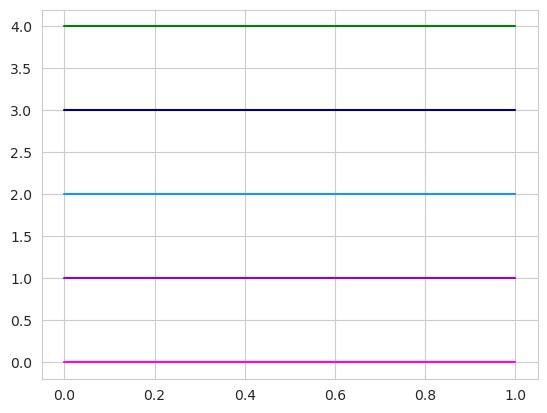

In [3]:
colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'mediumspringgreen',
          'g']

colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'navy',
          'g']

#colors = colors[:3]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

for i in range(len(colors)):
    plt.plot([0, 1], [i, i])

plt.show()

new_cmap = mpl.colors.ListedColormap(colors)

colors2 = [c for c in colors]
colors2.insert(0, 'k')
new_cmap2 = mpl.colors.ListedColormap(colors2)

In [4]:
data = pd.read_csv('Data/non_genotyped_PMBB_data_for_no_snps_clustering.csv', index_col='IID')
data

,abdominal_pelvic_pain,abnormal_cholesterol,asthma,dysmenorrhea,dysuria,fibromyalgia,high_risk_pregnancy_supervision,hypertension,ibs,infertility,irregular_menstruation,leiomyoma_of_uterus,lower_abdominal_pain,migraine,pain_with_sex,pcos,shortness_of_breath
IID,,,,,,,,,,,,,,,,,
PMBB1001462384555,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
PMBB1002857391938,1,0,1,1,0,0,0,1,0,0,1,0,1,1,1,0,0
PMBB1003210639911,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
PMBB1003222496744,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0
PMBB1003626451826,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMBB9993259322112,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
PMBB9994756680249,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0
PMBB9995182887713,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [5]:
from sklearn.metrics import pairwise_distances
dist_mtx = pd.DataFrame(pairwise_distances(data), index=data.index, columns=data.index)
dist_mtx

IID,PMBB1001462384555,PMBB1002857391938,PMBB1003210639911,PMBB1003222496744,PMBB1003626451826,PMBB1004325391026,PMBB1005252976083,PMBB1006656964324,PMBB1011916439505,PMBB1012175794211,...,PMBB9987252371205,PMBB9990373118350,PMBB9991089432357,PMBB9991448703098,PMBB9991994966750,PMBB9993259322112,PMBB9994756680249,PMBB9995182887713,PMBB9997370924922,PMBB9998857962671
IID,,,,,,,,,,,,,,,,,,,,,
PMBB1001462384555,0.000000,2.449490,2.000000,2.449490,2.000000,2.000000,2.000000,2.000000,2.645751,1.414214,...,1.414214,2.449490,2.236068,1.414214,1.000000,1.732051,2.236068,2.000000,1.732051,2.000000
PMBB1002857391938,2.449490,0.000000,3.162278,2.449490,2.449490,2.828427,2.828427,2.000000,2.645751,2.828427,...,2.828427,2.449490,2.236068,2.828427,2.645751,2.236068,2.236068,2.449490,3.000000,2.449490
PMBB1003210639911,2.000000,3.162278,0.000000,2.449490,2.000000,2.000000,1.414214,2.449490,2.236068,1.414214,...,1.414214,2.828427,2.645751,1.414214,2.236068,2.236068,2.645751,2.449490,1.000000,2.000000
PMBB1003222496744,2.449490,2.449490,2.449490,0.000000,2.000000,2.449490,2.000000,2.828427,2.236068,2.449490,...,2.828427,2.449490,2.236068,2.449490,2.645751,2.236068,2.645751,1.414214,2.645751,2.449490
PMBB1003626451826,2.000000,2.449490,2.000000,2.000000,0.000000,2.000000,1.414214,2.449490,2.236068,2.449490,...,2.000000,2.449490,2.236068,2.449490,2.236068,1.732051,2.236068,2.449490,1.732051,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMBB9993259322112,1.732051,2.236068,2.236068,2.236068,1.732051,1.732051,2.236068,1.732051,2.449490,2.236068,...,1.732051,2.645751,2.000000,2.236068,2.000000,0.000000,2.000000,2.236068,2.000000,2.645751
PMBB9994756680249,2.236068,2.236068,2.645751,2.645751,2.236068,2.236068,2.236068,2.236068,2.000000,2.645751,...,2.236068,2.236068,2.449490,2.645751,2.000000,2.000000,0.000000,2.236068,2.449490,2.645751
PMBB9995182887713,2.000000,2.449490,2.449490,1.414214,2.449490,2.449490,2.000000,2.449490,2.236068,2.000000,...,2.449490,2.449490,2.645751,2.000000,2.236068,2.236068,2.236068,0.000000,2.645751,2.000000


In [6]:
aff_mtx = np.exp(-1 * dist_mtx ** 2)
aff_mtx

IID,PMBB1001462384555,PMBB1002857391938,PMBB1003210639911,PMBB1003222496744,PMBB1003626451826,PMBB1004325391026,PMBB1005252976083,PMBB1006656964324,PMBB1011916439505,PMBB1012175794211,...,PMBB9987252371205,PMBB9990373118350,PMBB9991089432357,PMBB9991448703098,PMBB9991994966750,PMBB9993259322112,PMBB9994756680249,PMBB9995182887713,PMBB9997370924922,PMBB9998857962671
IID,,,,,,,,,,,,,,,,,,,,,
PMBB1001462384555,1.000000,0.002479,0.018316,0.002479,0.018316,0.018316,0.018316,0.018316,0.000912,0.135335,...,0.135335,0.002479,0.006738,0.135335,0.367879,0.049787,0.006738,0.018316,0.049787,0.018316
PMBB1002857391938,0.002479,1.000000,0.000045,0.002479,0.002479,0.000335,0.000335,0.018316,0.000912,0.000335,...,0.000335,0.002479,0.006738,0.000335,0.000912,0.006738,0.006738,0.002479,0.000123,0.002479
PMBB1003210639911,0.018316,0.000045,1.000000,0.002479,0.018316,0.018316,0.135335,0.002479,0.006738,0.135335,...,0.135335,0.000335,0.000912,0.135335,0.006738,0.006738,0.000912,0.002479,0.367879,0.018316
PMBB1003222496744,0.002479,0.002479,0.002479,1.000000,0.018316,0.002479,0.018316,0.000335,0.006738,0.002479,...,0.000335,0.002479,0.006738,0.002479,0.000912,0.006738,0.000912,0.135335,0.000912,0.002479
PMBB1003626451826,0.018316,0.002479,0.018316,0.018316,1.000000,0.018316,0.135335,0.002479,0.006738,0.002479,...,0.018316,0.002479,0.006738,0.002479,0.006738,0.049787,0.006738,0.002479,0.049787,0.002479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMBB9993259322112,0.049787,0.006738,0.006738,0.006738,0.049787,0.049787,0.006738,0.049787,0.002479,0.006738,...,0.049787,0.000912,0.018316,0.006738,0.018316,1.000000,0.018316,0.006738,0.018316,0.000912
PMBB9994756680249,0.006738,0.006738,0.000912,0.000912,0.006738,0.006738,0.006738,0.006738,0.018316,0.000912,...,0.006738,0.006738,0.002479,0.000912,0.018316,0.018316,1.000000,0.006738,0.002479,0.000912
PMBB9995182887713,0.018316,0.002479,0.002479,0.135335,0.002479,0.002479,0.018316,0.002479,0.006738,0.018316,...,0.002479,0.002479,0.000912,0.018316,0.006738,0.006738,0.006738,1.000000,0.000912,0.018316


In [7]:
from numpy.linalg import eig

n_evecs = 5
evals, evec = eig(aff_mtx)
evec_df = pd.DataFrame(evec[:,:n_evecs], index=aff_mtx.index, columns=[f'eigenvector {i+1}' for i in range(n_evecs)])
evec_df

,eigenvector 1,eigenvector 2,eigenvector 3,eigenvector 4,eigenvector 5
IID,,,,,
PMBB1001462384555,0.013065+0.000000j,0.033769+0.000000j,-0.014543+0.000000j,-0.024449+0.000000j,-0.040551+0.000000j
PMBB1002857391938,0.000098+0.000000j,0.000525+0.000000j,-0.000527+0.000000j,-0.000206+0.000000j,0.000246+0.000000j
PMBB1003210639911,0.013111+0.000000j,0.027592+0.000000j,0.025525+0.000000j,0.025878+0.000000j,0.028994+0.000000j
PMBB1003222496744,0.000571+0.000000j,0.002204+0.000000j,-0.002325+0.000000j,0.002030+0.000000j,0.002478+0.000000j
PMBB1003626451826,0.000979+0.000000j,0.008478+0.000000j,0.000942+0.000000j,0.001827+0.000000j,0.000607+0.000000j
...,...,...,...,...,...
PMBB9993259322112,0.001508+0.000000j,0.008411+0.000000j,0.002583+0.000000j,-0.006588+0.000000j,-0.002003+0.000000j
PMBB9994756680249,0.000311+0.000000j,0.002507+0.000000j,-0.000243+0.000000j,-0.001425+0.000000j,0.000314+0.000000j
PMBB9995182887713,0.002248+0.000000j,0.004349+0.000000j,-0.007271+0.000000j,-0.000806+0.000000j,0.006486+0.000000j


In [8]:
clusters = pd.read_csv('Data/NG_PMBB_clusters.csv', index_col='IID')
clusters.value_counts().sort_index()

Cluster
1           441
2           686
3          1151
4           796
5          1004
dtype: int64

/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/matplotlib/collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/matplotlib/collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:389: ComplexWarning: Casting complex 

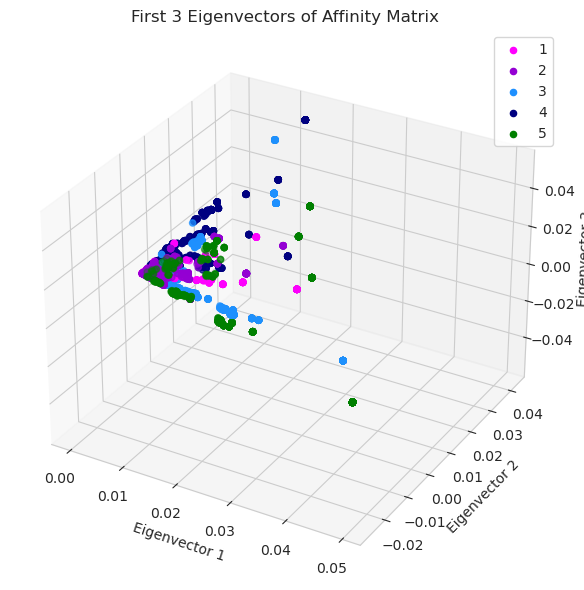

In [9]:
plot_df = pd.concat([evec_df, clusters], axis=1).sort_values(by='Cluster')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(8, 6)

for cluster, subDF in plot_df.groupby('Cluster'):
    ax.scatter(subDF['eigenvector 1'], subDF['eigenvector 2'], subDF['eigenvector 3'], c=f'C{cluster-1}', label=str(cluster))
ax.legend()

ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
ax.set_zlabel('Eigenvector 3')

ax.set_title('First 3 Eigenvectors of Affinity Matrix')
plt.tight_layout()

plt.savefig('Plots/evecs_3D_by_cluster.png', bbox_inches='tight')
plt.show()

/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/home/guarelin/mambaforge/envs/py38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1181: ComplexWarning: Casting complex values to real discards the ima

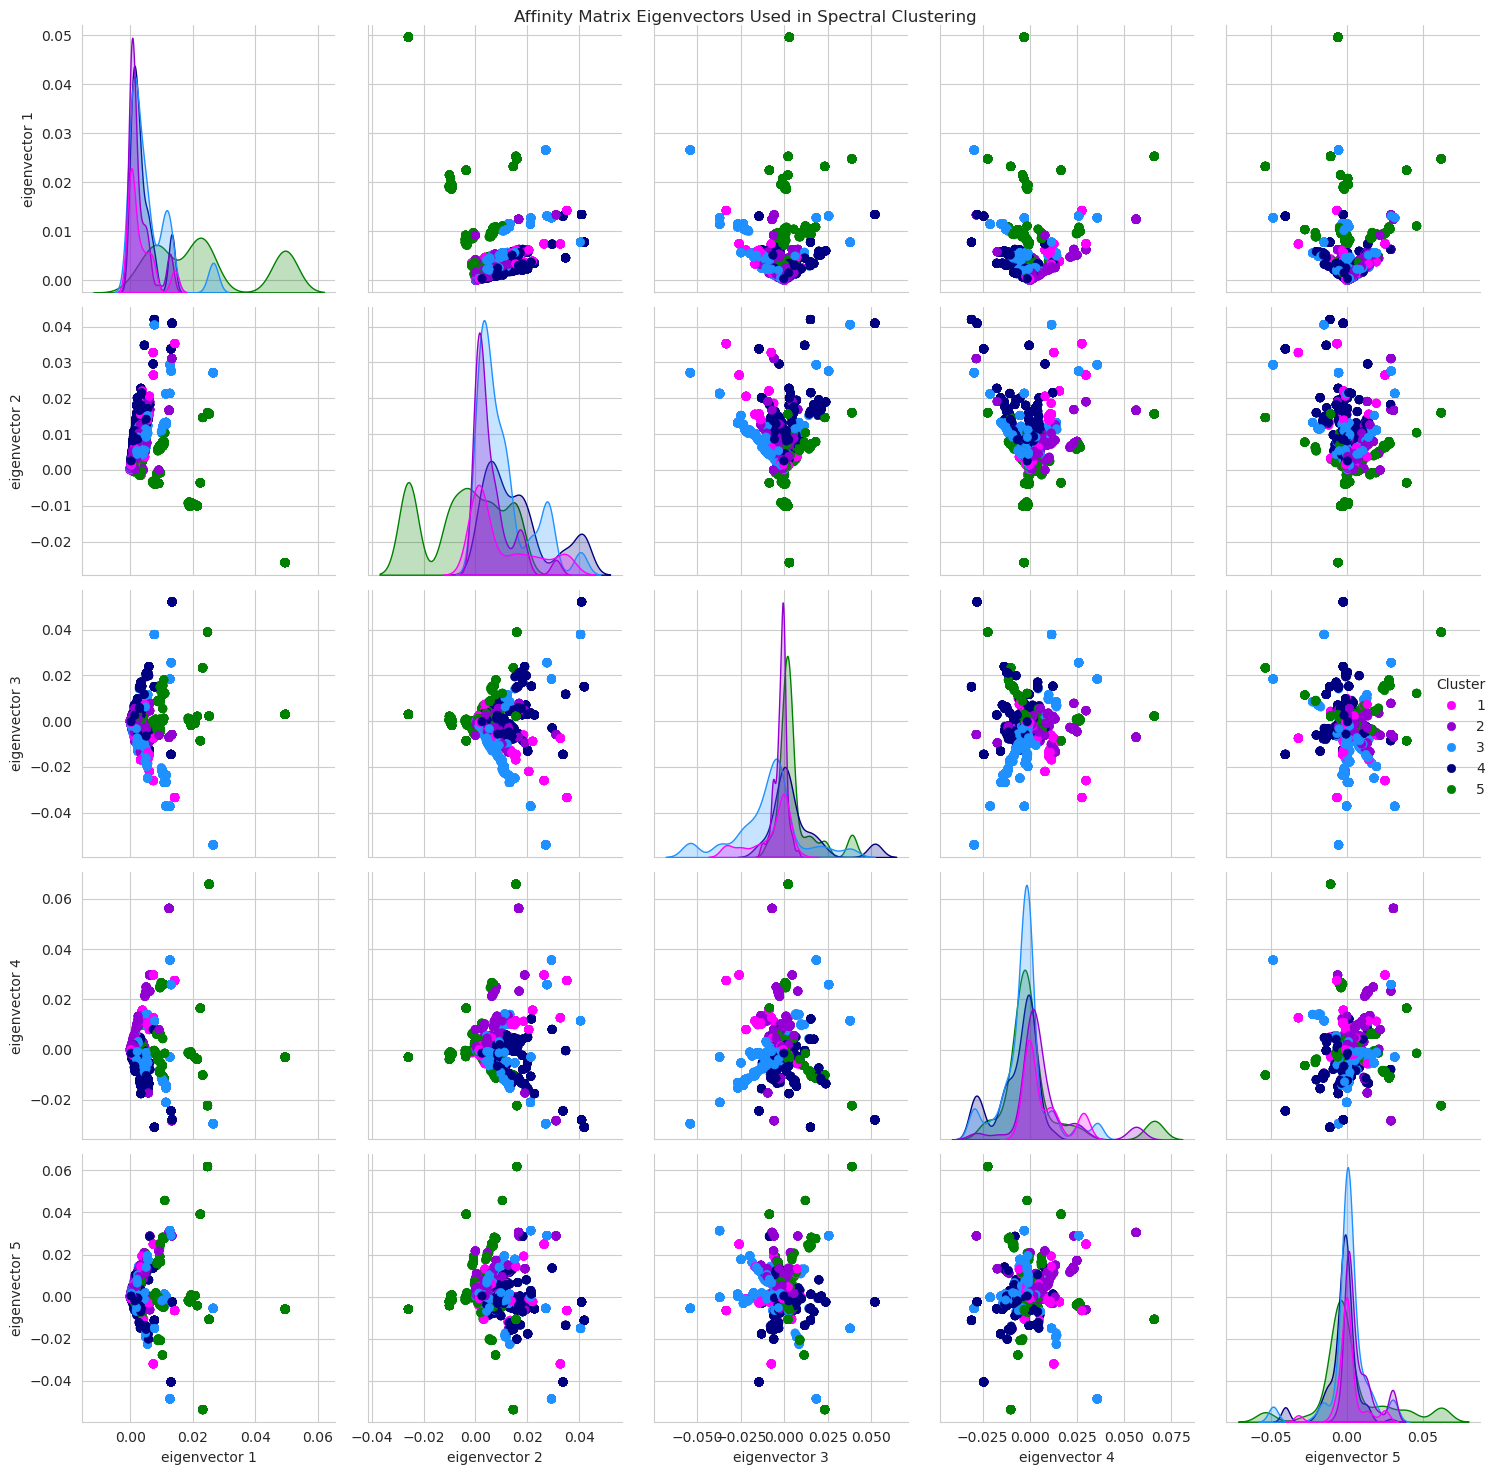

In [10]:
plot_df = pd.concat([evec_df, clusters], axis=1)

sns.pairplot(plot_df,
             vars=[f'eigenvector {i+1}' for i in range(n_evecs)],
             hue='Cluster', palette=colors,
             plot_kws={'edgecolor': None})

plt.suptitle('Affinity Matrix Eigenvectors Used in Spectral Clustering')
plt.gcf().set_size_inches(15, 15)
plt.tight_layout()
plt.savefig('../Manuscript_Plots/figure_2_spectral_clustering_eigenvecs_pairplot.png', bbox_inches='tight')
plt.show()